# Лабораторная работа №3. Линейный дискриминантный анализ

Выполнили: Рутин Василий, Гордеев Станислав

Все лабораторные работы доступны по адресу: https://github.com/Omenstudio/ML_IFMO_LABS

## 1. Постановка задачи

1. Прочитать теоретическую часть
2. Описать структуру исходных данных для своего набора:<br>
	a. общие характеристики массива данных: предметная область, количество записей<br>
	b. входные параметры: названия и типы<br>
    c. выходной класс: название и значения<br>
3. Осуществить визуализацию двух любых признаков и посчитать коэффициент корреляции между ними
4. Выполнить разбиение классов набора данных с помощью LDA (LinearDiscriminantAnalysis). Осуществить визуализацию разбиения
5. Осуществить классификацию с помощью методов LDA и QDA (LinearDiscriminantAnalysis и QuadraticDiscriminantAnalysis). Сравнить полученные результаты

## 2. Исходные данные

Задача классификации: определение наличия заболевания (диабет) у женщин.<br>
Датасет доступен по адресу: https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

Количество записей: 768<br>
Количество атрибутов: 8 плюс класс.<br>
Все атрибуты представлены числовыми значениями:
1. Количество беременностей (шт.)
2. Концентрация плазмы глюкозы (ммоль/л)
3. Диастолическое давление (мм. рт. столба)
4. Толщина кожной складки (мм.)
5. Содержание инсулина (мкЕд/мл)
6. Индекс массы тела (кг/м2)
7. Предрасположенность по родословной линии (Diabetes pedigree function)
8. Возраст (лет)
9. Класс: наличие диабета (0, 1)

## 3. Ход работы

Для начала считаем датасет и визуализируем два признака. Скажем, (2) Концентрцию плазмы в крови и (4) толщину кожной складки. А так же сразу же посчитаем коэффициент корреляции между ними.

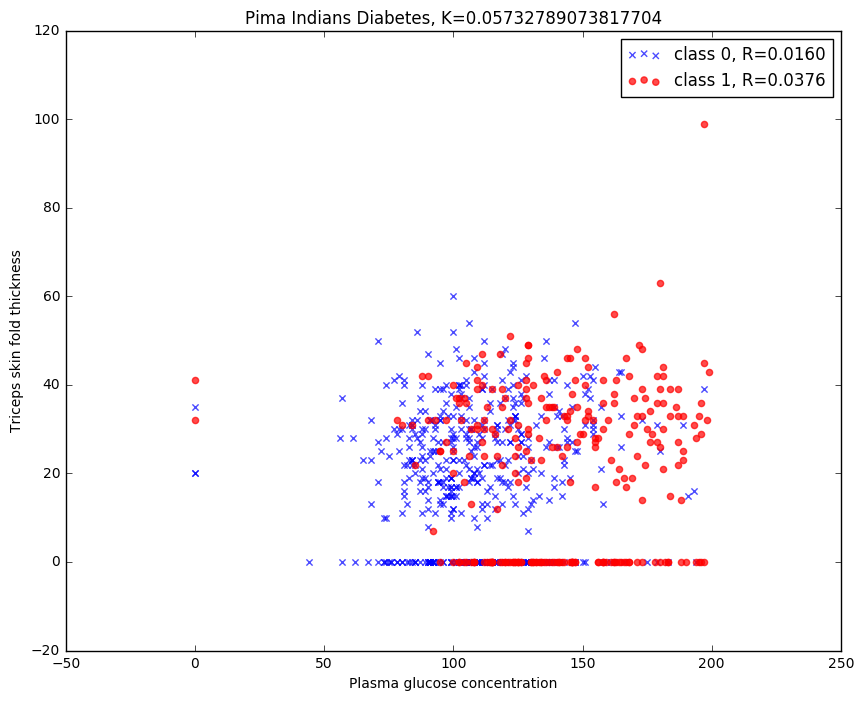

Correlation coef (Pearson)=0.05732789073817704


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn import metrics


# Чтение датасета
dataset_full = np.loadtxt(open("../pima-indians-diabetes.data.csv", "r"), delimiter=",", skiprows=0, dtype=np.float64)
inputs = dataset_full[:, :-1]
outputs = dataset_full[:, -1]
outputs = outputs.astype(np.int64, copy=False)

# Визуализация двух признаков
plt.figure(figsize=(10, 8))
for class_number, marker, color in zip((0, 1), ('x', 'o'), ('blue', 'red')):
    # Вычисление коэффициента корреляции Пирсона
    R = pearsonr(inputs[:, 1][outputs == class_number], inputs[:, 3][outputs == class_number])
    # Отображение класса на графике
    plt.scatter(x=inputs[:, 1][outputs == class_number],
                y=inputs[:, 3][outputs == class_number],
                marker=marker,
                color=color,
                alpha=0.7,
                label='class {:}, R={:.4f}'.format(class_number, R[0])
                )
corel_coef = pearsonr(inputs[:, 1], inputs[:, 3])[0]
plt.title('Pima Indians Diabetes, K={}'.format(corel_coef))
plt.xlabel('Plasma glucose concentration')
plt.ylabel('Triceps skin fold thickness')
plt.legend(loc='upper right')
plt.show()
print('Correlation coef (Pearson)={}'.format(corel_coef))

Далее разбиваем выборку на тестовую и обучающую, нормализуем, чтобы привести значения к сходным диапазонам. Ну и отобразим срез обучающей и тестовой выборок по выбранным параметрам.

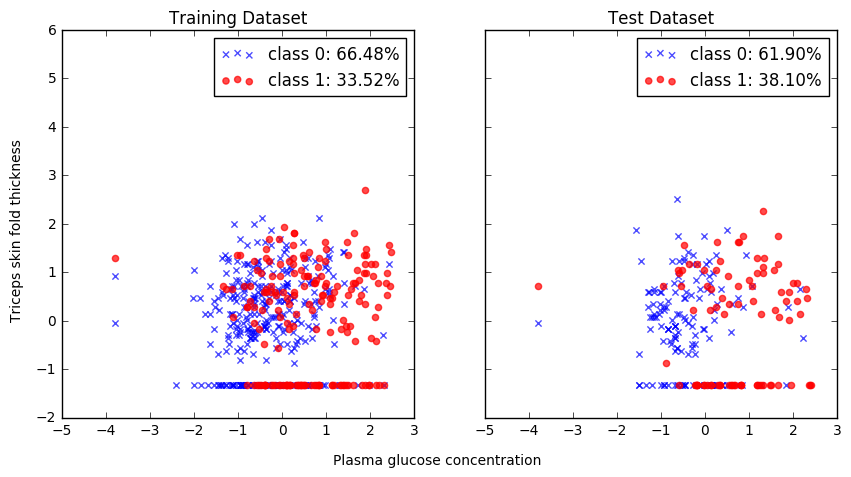

In [2]:
# Разбиение выборки и нормализация
inputs_train, inputs_test, outputs_train, outputs_test \
    = train_test_split(inputs, outputs, test_size=0.30, random_state=123)
std_scale = preprocessing.StandardScaler().fit(inputs_train)
inputs_train = std_scale.transform(inputs_train)
inputs_test = std_scale.transform(inputs_test)

# Визуализация двух признаков для разных выборок
f, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))
for a, inp, outp in zip(ax, (inputs_train, inputs_test), (outputs_train, outputs_test)):
    for class_number, marker, color in zip((0, 1), ('x', 'o'), ('blue', 'red')):
        a.scatter(x=inp[:, 1][outp == class_number],
                  y=inp[:, 3][outp == class_number],
                  marker=marker,
                  color=color,
                  alpha=0.7,
                  label='class {}: {:.2%}'.format(class_number, list(outp).count(class_number) / outp.shape[0])
                  )
    a.legend(loc='upper right')
ax[0].set_title('Training Dataset')
ax[1].set_title('Test Dataset')
f.text(0.5, 0.04, 'Plasma glucose concentration', ha='center', va='center')
f.text(0.08, 0.5, 'Triceps skin fold thickness', ha='center', va='center', rotation='vertical')
plt.show()

Обучаем LDA и пытаемся визуализировать векторы преобразованных данных после разделения LDA. Поскольку у нас всего 2 класса, библиотечный LDA не преобразует данные в более чем 1 вектор.

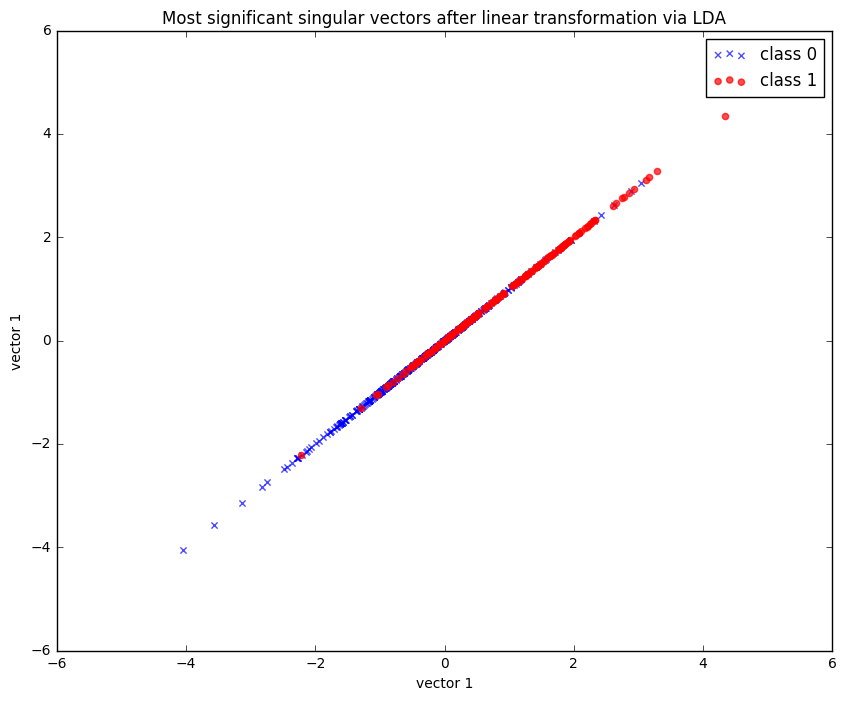

In [3]:
# Разбиение LDA и визуализация
sklearn_lda = LDA(n_components=2)  # TODO: почему-то возвращает не два значимых вектора, а один!! print(sklearn_transf.shape) = (537, 1)
sklearn_transf = sklearn_lda.fit(inputs_train, outputs_train).transform(inputs_train)
# print(sklearn_transf.shape)
plt.figure(figsize=(10, 8))
for label, marker, color in zip((0, 1), ('x', 'o'), ('blue', 'red')):
    plt.scatter(x=sklearn_transf[:, 0][outputs_train == label],
                y=sklearn_transf[:, 0][outputs_train == label],
                marker=marker,
                color=color,
                alpha=0.7,
                label='class {}'.format(label)
                )
plt.xlabel('vector 1')
plt.ylabel('vector 1')
plt.legend()
plt.title('Most significant singular vectors after linear transformation via LDA')
plt.show()

Ну и наконец обучаем и классифицируем LDA и QDA.

In [4]:
# ТЕСТ LDA и QDA
print('------------')
classificators = [LDA(), QDA()]
for clf in classificators:
    clf.fit(inputs_train, outputs_train)
    pred_train = clf.predict(inputs_train)
    pred_test = clf.predict(inputs_test)
    print(clf)
    print('Точность на обучающем наборе {:.2%}'.format(metrics.accuracy_score(outputs_train, pred_train)))
    print('Точность на тестовом наборе {:.2%}'.format(metrics.accuracy_score(outputs_test, pred_test)))
    print('------------')

------------
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
Точность на обучающем наборе 77.09%
Точность на тестовом наборе 81.39%
------------
QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=False, tol=0.0001)
Точность на обучающем наборе 75.61%
Точность на тестовом наборе 78.79%
------------


## 4. Заключение

В ходе лабораторной работы:<br>
1. Dизуализирована выборка по 2 параметрам: концентрциz плазмы в крови и толщина кожной складки
2. Выборка нормализована, разбита и визуализирована
3. Выполнена визуализация разбиения
4. Осуществлена классификация с помощью LDA и QDA.

Линейный дискриминантый анализ показал большую точность, чем квадратичный, что следует связать с характером датасета и поставленной задачи классификации. В других случаях QDA будет иметь более высокую точность.